# Capstone Project - Best San Diego Neighboorhood

In [1]:
import requests
import csv
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [2]:
# Get all zip codes of cities in San Diego County
from bs4 import BeautifulSoup
import requests
source =  requests.get('http://www.sdcourt.ca.gov/portal/page?_pageid=55,1524259&_dad=portal&_schema=PORTAL').text  # gets the html content of the page
soup = BeautifulSoup(source,'lxml') # lxml is the parser
print(soup.prettify())  

<html dir="LTR" lang="en">
 <head>
  <title>
   Zip Code Directory
  </title>
  <link href="http://www.sdcourt.ca.gov/pls/portal/PORTAL.wwv_setting.render_css?p_lang_type=NOBIDI&amp;p_subscriberid=1&amp;p_styleid=1&amp;p_siteid=55&amp;p_rctx=P&amp;p_styleid=1055025&amp;p_siteid=55&amp;p_rctx=R&amp;p_styleid=1055026&amp;p_siteid=55&amp;p_rctx=R&amp;p_styleid=1214586&amp;p_siteid=55&amp;p_rctx=R" rel="Stylesheet" type="text/css"/>
  <base href="http://www.sdcourt.ca.gov/pls/portal/"/>
  <meta content="Zip Code Directory" name="title"/>
  <meta content="" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="PORTAL" name="author"/>
 </head>
 <body class="Bodyid1siteid55" leftmargin="0" marginheight="0" marginwidth="0" rightmargin="0" topmargin="0">
  <script type="text/javascript">
   function show_context_help(h) { 
    newWindow = window.open(h,"Help", "menubar=1,toolbar=1,scrollbars=1,resizable=1,width=700, height=500"); 
}
  </script>
  <noscript>
  </noscript>
  

In [3]:
data = []
table = soup.find('table', attrs={'class':'sdcourttable'})
for row in table.findAll('tr'):
    cols = row.findAll('td')
    output_row = []
    for column in cols:
        output_row.append(column.text.strip())
    data.append(output_row)

In [4]:
# Convert list of lists to DataFrame
dataPD = pd.DataFrame(data)

In [5]:
ndataPD = dataPD[1:] #take the data less the empty row
tHeader = ['ZipCode','Name','Neighborhood','ZipCode2','Name2','Neighborhood2','ZipCode3','Name3','Neighborhood3']
ndataPD.columns = tHeader #set the header row 
ndataPD.reset_index(drop=True)

,ZipCode,Name,Neighborhood,ZipCode2,Name2,Neighborhood2,ZipCode3,Name3,Neighborhood3
0,91901,ALPINE,EAST,92037,LA JOLLA,CENTRAL,92123,"SD, SERRA MESA",CENTRAL
1,91902,BONITA,SOUTH,92038,LA JOLLA (POB),CENTRAL,92124,"SD, TIERRASANTA",CENTRAL
2,91903,ALPINE (POB),EAST,92039,LA JOLLA (POB),CENTRAL,92126,"SD, MIRA MESA",CENTRAL
3,91905,BOULEVARD,EAST,92040,LAKESIDE,EAST,92127,"SD, RANCHO BERNARDO",CENTRAL
4,91906,CAMPO,EAST,92046,ESCONDIDO (POB),NORTH,92128,"SD, RANCHO BERNARDO",CENTRAL
5,91908,BONITA (POB),SOUTH,92049,OCEANSIDE(POB),NORTH,92129,"SD, RANCHO PENASQUITOS",CENTRAL
6,91909,CHULA VISTA (POB),SOUTH,92051,OCEANSIDE(POB),NORTH,92130,"SD, CARMEL VALLEY",CENTRAL
7,91910,CHULA VISTA,SOUTH,92052,OCEANSIDE(POB),NORTH,92131,"SD, SCRIPPS RANCH",CENTRAL
8,91911,CHULA VISTA,SOUTH,92054,"OCEANSIDE, CAMP PNDLTN",NORTH,92132,"*SD, (Naval Supply Center)",CENTRAL
9,91912,CHULA VISTA (POB),SOUTH,92055,CAMP PENDLETON,NORTH,92134,"*SD, (Naval Hospital)",CENTRAL


In [6]:
ndataPD1 = ndataPD[['ZipCode','Name','Neighborhood']]
ndataPD2 = ndataPD[['ZipCode2','Name2','Neighborhood2']]
ndataPD3 = ndataPD[['ZipCode3','Name3','Neighborhood3']]
mergedDF = pd.concat([ndataPD1,ndataPD2.rename(columns={'ZipCode2':'ZipCode','Name2':'Name','Neighborhood2':'Neighborhood'}),ndataPD3.rename(columns={'ZipCode3':'ZipCode','Name3':'Name','Neighborhood3':'Neighborhood'})],ignore_index=True)

In [7]:
mergedDF.tail(10)

,ZipCode,Name,Neighborhood
179,92191,"SD, SORRENTO VALLEY (POB)",CENTRAL
180,92192,"SD, UNIVERSITY CITY (POB)",CENTRAL
181,92193,"SD, SERRA MESA (POB)",CENTRAL
182,92194,"SD, SERRA MESA (POB)",CENTRAL
183,92195,"SD , ROLANDO (POB)",CENTRAL
184,92196,"SD , MIRA MESA (POB)",CENTRAL
185,92197,"SD , RANCHO BERNARDO",CENTRAL
186,92198,"SD, RANCHO BERNARDO (POB)",CENTRAL
187,92199,"SD, RANCHO BERNARDO",CENTRAL
188,,,


In [8]:
mergedDF.drop(mergedDF.index[188], inplace=True)

In [9]:
#Get the crime data set for San Diego Neighborhood for the past 6 months
# SOURCE:  http://www.sandag.org/programs/public_safety/arjis/CrimeData/crimedata.zip
# Source is in a zip folder
sdcrimedata = pd.read_csv("ARJISPublicCrime030619.txt", encoding = "ISO-8859-1",parse_dates=True)

In [10]:
# How does the data look like
sdcrimedata.head(5)

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/9/2018 20:25:00,1200 W BLOCK MAIN STREET,92020.0,EL CAJON
1,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,POSS CONTROLLED SUBS PARAPHERNALIA (M),10/10/2018 8:53:11,JAMACHA ROAD / SHADOW VISTA WAY,92020.0,EL CAJON
2,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,DISORDERLY CONDUCT: ALCOHOL,10/10/2018 0:40:00,E MAIN STREET / N MOLLISON AVENUE,NaN,EL CAJON
3,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2018 1:51:00,200 BLOCK LINCOLN AVENUE,92020.0,EL CAJON
4,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,POSSESS CONTROLLED SUBSTANCE (M),10/9/2018 18:00:00,400 BLOCK BROADWAY,92021.0,EL CAJON


In [11]:
# Know the dataset
sdcrimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58939 entries, 0 to 58938
Data columns (total 7 columns):
CM_LEGEND                  58595 non-null object
agency                     58939 non-null object
Charge_Description_Orig    58938 non-null object
activityDate               58939 non-null object
BLOCK_ADDRESS              58939 non-null object
ZipCode                    58033 non-null float64
community                  57394 non-null object
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


In [12]:
# Lets fill missing values of ZipCode with '0'
sdcrimedata = sdcrimedata.fillna('0')


In [13]:
#drop rows if zipcode is '0'
indexNames = sdcrimedata[sdcrimedata.ZipCode == '0'].index
sdcrimedata.drop(indexNames , inplace=True)

#drop rows if CN_LEGEND is 0
indexNames = sdcrimedata[sdcrimedata.CM_LEGEND == '0'].index
sdcrimedata.drop(indexNames , inplace=True)

In [14]:
sdcrimedata['ZipCode'] = sdcrimedata['ZipCode'].astype(int)

In [15]:
mergedDF['ZipCode'] = mergedDF['ZipCode'].str.strip()

In [16]:
mergedDF['ZipCode'] = mergedDF['ZipCode'].astype(int)

In [17]:
# mergedDF contains all Zipcodes of San Diego
# Join this with the crime data
sd_zip_crime = pd.merge(sdcrimedata,mergedDF, how='inner')

In [18]:
#Get Latitude, Longitude from Zipcode
#https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/
latlong_zip = pd.read_csv("us-zip-code-latitude-and-longitude.txt", sep=';')

In [19]:
#Rename Zip to ZipCode
latlong_zip.rename(columns={'Zip':'ZipCode'}, inplace=True)

latlong_zip['ZipCode'] = latlong_zip['ZipCode'].apply(int)

# Merge latitude and Longitude with zip Code
sd_zip_crime_geo = pd.merge(sd_zip_crime,latlong_zip[['ZipCode','Latitude','Longitude']], on='ZipCode', how='inner')

In [20]:
sd_zip_crime_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56559 entries, 0 to 56558
Data columns (total 11 columns):
CM_LEGEND                  56559 non-null object
agency                     56559 non-null object
Charge_Description_Orig    56559 non-null object
activityDate               56559 non-null object
BLOCK_ADDRESS              56559 non-null object
ZipCode                    56559 non-null int32
community                  56559 non-null object
Name                       56559 non-null object
Neighborhood               56559 non-null object
Latitude                   56559 non-null float64
Longitude                  56559 non-null float64
dtypes: float64(2), int32(1), object(8)
memory usage: 5.0+ MB


In [21]:
sd_zip_crime_geo.head(5)

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community,Name,Neighborhood,Latitude,Longitude
0,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/9/2018 20:25:00,1200 W BLOCK MAIN STREET,92020,EL CAJON,EL CAJON,EAST,32.7991,-116.97334
1,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,POSS CONTROLLED SUBS PARAPHERNALIA (M),10/10/2018 8:53:11,JAMACHA ROAD / SHADOW VISTA WAY,92020,EL CAJON,EL CAJON,EAST,32.7991,-116.97334
2,DRUGS/ALCOHOL VIOLATIONS,EL CAJON,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2018 1:51:00,200 BLOCK LINCOLN AVENUE,92020,EL CAJON,EL CAJON,EAST,32.7991,-116.97334
3,DUI,EL CAJON,DUI ALCOHOL/DRUG (M),10/10/2018 21:45:16,300 BLOCK CHAMBERS STREET,92020,EL CAJON,EL CAJON,EAST,32.7991,-116.97334
4,DUI,EL CAJON,DUI ALC/0.08 PERCENT (M),10/9/2018 17:46:00,100 BLOCK CIVIC CENTER WAY,92020,EL CAJON,EL CAJON,EAST,32.7991,-116.97334


In [22]:
# Drop the columns that are not required for further calculation
sd_zip_crime_geo.drop(['agency','Charge_Description_Orig','activityDate','BLOCK_ADDRESS','community','Name'], axis = 1,inplace=True)

In [23]:
# get all zipcode sales from Zillow

allzipcode = pd.read_csv("https://s3-us-west-2.amazonaws.com/econresearch/Reports/Core/RDC_InventoryCoreMetrics_Zip_sfh.csv")


In [24]:
# Goal is to get the ZipCode and the AVG Listing Price
allzipcodeprice = allzipcode[['ZipCode','ZipName','Avg Listing Price']]

In [25]:
# Fill missing values in Zipcode with 0 and convert to type int
allzipcodeprice = allzipcodeprice.fillna('0')
allzipcodeprice['ZipCode'] = allzipcodeprice['ZipCode'].astype(int)
allzipcodeprice['Avg Listing Price'] = allzipcodeprice['Avg Listing Price'].astype(int)

In [26]:
#merge Crime by Zip with all zip code with inner join
sd_zip_crime_geo_hprice= pd.merge(sd_zip_crime_geo,allzipcodeprice, how='inner')

In [27]:
sd_zip_crime_geo_hprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55327 entries, 0 to 55326
Data columns (total 7 columns):
CM_LEGEND            55327 non-null object
ZipCode              55327 non-null int32
Neighborhood         55327 non-null object
Latitude             55327 non-null float64
Longitude            55327 non-null float64
ZipName              55327 non-null object
Avg Listing Price    55327 non-null int32
dtypes: float64(2), int32(2), object(3)
memory usage: 3.0+ MB


In [28]:
sd_zip_crime_geo_hprice.head(10)

,CM_LEGEND,ZipCode,Neighborhood,Latitude,Longitude,ZipName,Avg Listing Price
0,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
1,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
2,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
3,DUI,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
4,DUI,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
5,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
6,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
7,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
8,DRUGS/ALCOHOL VIOLATIONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721
9,WEAPONS,92020,EAST,32.7991,-116.97334,"El Cajon, CA",632721


In [29]:
sdtemp = sd_zip_crime_geo_hprice.groupby(['ZipName', 'ZipCode', 'Latitude','Longitude','Avg Listing Price']).size().reset_index(name='CrimeCounts')
#sd_zip_crime.groupby('ZipName',as_index=False)['Avg Listing Price'].mean()

In [30]:
sdtemp 

,ZipName,ZipCode,Latitude,Longitude,Avg Listing Price,CrimeCounts
0,"Alpine, CA",91901,32.823102,-116.73864,788643,335
1,"Bonita, CA",91902,32.663803,-117.02456,888508,153
2,"Bonsall, CA",92003,33.289265,-117.20011,1168151,60
3,"Borrego Springs, CA",92004,33.184028,-116.26597,402984,17
4,"Cardiff by the Sea, CA",92007,33.026742,-117.27816,2073052,138
5,"Carlsbad, CA",92008,33.158137,-117.32646,1826817,984
6,"Carlsbad, CA",92009,33.097841,-117.26744,1359742,364
7,"Chula Vista, CA",91910,32.638654,-117.06686,706123,1646
8,"Chula Vista, CA",91911,32.608799,-117.06070,517794,1439
9,"Chula Vista, CA",91913,32.642486,-116.98973,633859,319


In [31]:
#sandiego population by zip code from https://www.zip-codes.com/city/ca-san-diego.asp
sd_pop = pd.read_excel("sd_population.xlsx")

In [32]:
sd_pop.head(5)

,ZIP Code,City,Population
0,91901,Alpine,17403
1,91902,Bonita,17653
2,91903,Alpine,0
3,91905,Boulevard,1700
4,91906,Campo,3627


In [33]:
sd_pop.rename(columns={'ZIP Code':'ZipCode'}, inplace=True)

In [34]:
sd_pop.dtypes

ZipCode        int64
City          object
Population     int64
dtype: object

In [35]:
sd_zip_crime_geo_hprice_pop = pd.merge(sdtemp,sd_pop, how='inner')

In [36]:
sd_zip_crime_geo_hprice_pop.head(10)

,ZipName,ZipCode,Latitude,Longitude,Avg Listing Price,CrimeCounts,City,Population
0,"Alpine, CA",91901,32.823102,-116.73864,788643,335,Alpine,17403
1,"Bonita, CA",91902,32.663803,-117.02456,888508,153,Bonita,17653
2,"Bonsall, CA",92003,33.289265,-117.20011,1168151,60,Bonsall,4746
3,"Borrego Springs, CA",92004,33.184028,-116.26597,402984,17,Borrego Springs,3881
4,"Cardiff by the Sea, CA",92007,33.026742,-117.27816,2073052,138,Cardiff By The Sea,10429
5,"Carlsbad, CA",92008,33.158137,-117.32646,1826817,984,Carlsbad,27649
6,"Carlsbad, CA",92009,33.097841,-117.26744,1359742,364,Carlsbad,40747
7,"Chula Vista, CA",91910,32.638654,-117.06686,706123,1646,Chula Vista,75802
8,"Chula Vista, CA",91911,32.608799,-117.06070,517794,1439,Chula Vista,82999
9,"Chula Vista, CA",91913,32.642486,-116.98973,633859,319,Chula Vista,40971


In [37]:
sd_zip_crime_geo_hprice_pop.shape

(79, 8)

In [38]:
#crimeRate is number of crime reported divided by the population per 100,000
sd_zip_crime_geo_hprice_pop['crimeRate'] =  (sd_zip_crime_geo_hprice_pop ['CrimeCounts'] / sd_zip_crime_geo_hprice_pop ['Population'] ) * 100000

In [39]:
sd_zip_crime_geo_hprice_pop.head(10)

,ZipName,ZipCode,Latitude,Longitude,Avg Listing Price,CrimeCounts,City,Population,crimeRate
0,"Alpine, CA",91901,32.823102,-116.73864,788643,335,Alpine,17403,1924.955467
1,"Bonita, CA",91902,32.663803,-117.02456,888508,153,Bonita,17653,866.708208
2,"Bonsall, CA",92003,33.289265,-117.20011,1168151,60,Bonsall,4746,1264.222503
3,"Borrego Springs, CA",92004,33.184028,-116.26597,402984,17,Borrego Springs,3881,438.031435
4,"Cardiff by the Sea, CA",92007,33.026742,-117.27816,2073052,138,Cardiff By The Sea,10429,1323.233292
5,"Carlsbad, CA",92008,33.158137,-117.32646,1826817,984,Carlsbad,27649,3558.899056
6,"Carlsbad, CA",92009,33.097841,-117.26744,1359742,364,Carlsbad,40747,893.317299
7,"Chula Vista, CA",91910,32.638654,-117.06686,706123,1646,Chula Vista,75802,2171.446664
8,"Chula Vista, CA",91911,32.608799,-117.06070,517794,1439,Chula Vista,82999,1733.755828
9,"Chula Vista, CA",91913,32.642486,-116.98973,633859,319,Chula Vista,40971,778.599497


In [40]:
sd_zip_crime_geo_hprice_pop.sort_values('crimeRate',ascending=True, inplace=True)

In [41]:
sd_zip_crime_geo_hprice_pop.head(10)

,ZipName,ZipCode,Latitude,Longitude,Avg Listing Price,CrimeCounts,City,Population,crimeRate
3,"Borrego Springs, CA",92004,33.184028,-116.26597,402984,17,Borrego Springs,3881,438.031435
39,"Rancho Santa Fe, CA",92067,33.016492,-117.20264,4877557,43,Rancho Santa Fe,9535,450.970110
65,"San Diego, CA",92129,32.961014,-117.12510,847213,269,San Diego,51536,521.965228
67,"San Diego, CA",92131,32.918035,-117.08438,1221888,179,San Diego,32787,545.948089
25,"Julian, CA",92036,33.027570,-116.53109,745463,19,Julian,3440,552.325581
12,"Coronado, CA",92118,32.682727,-117.17441,3870059,164,Coronado,23575,695.652174
78,"Warner Springs, CA",92086,33.337152,-116.69355,1045393,11,Warner Springs,1573,699.300699
64,"San Diego, CA",92128,32.998855,-117.07054,793956,343,San Diego,47490,722.257317
66,"San Diego, CA",92130,32.946776,-117.21918,2051795,363,San Diego,48940,741.724561
68,"San Diego, CA",92139,32.677286,-117.05241,499803,263,San Diego,35125,748.754448


#Exploratory Data analysis


Text(0,0.5,'Number of Crimes')

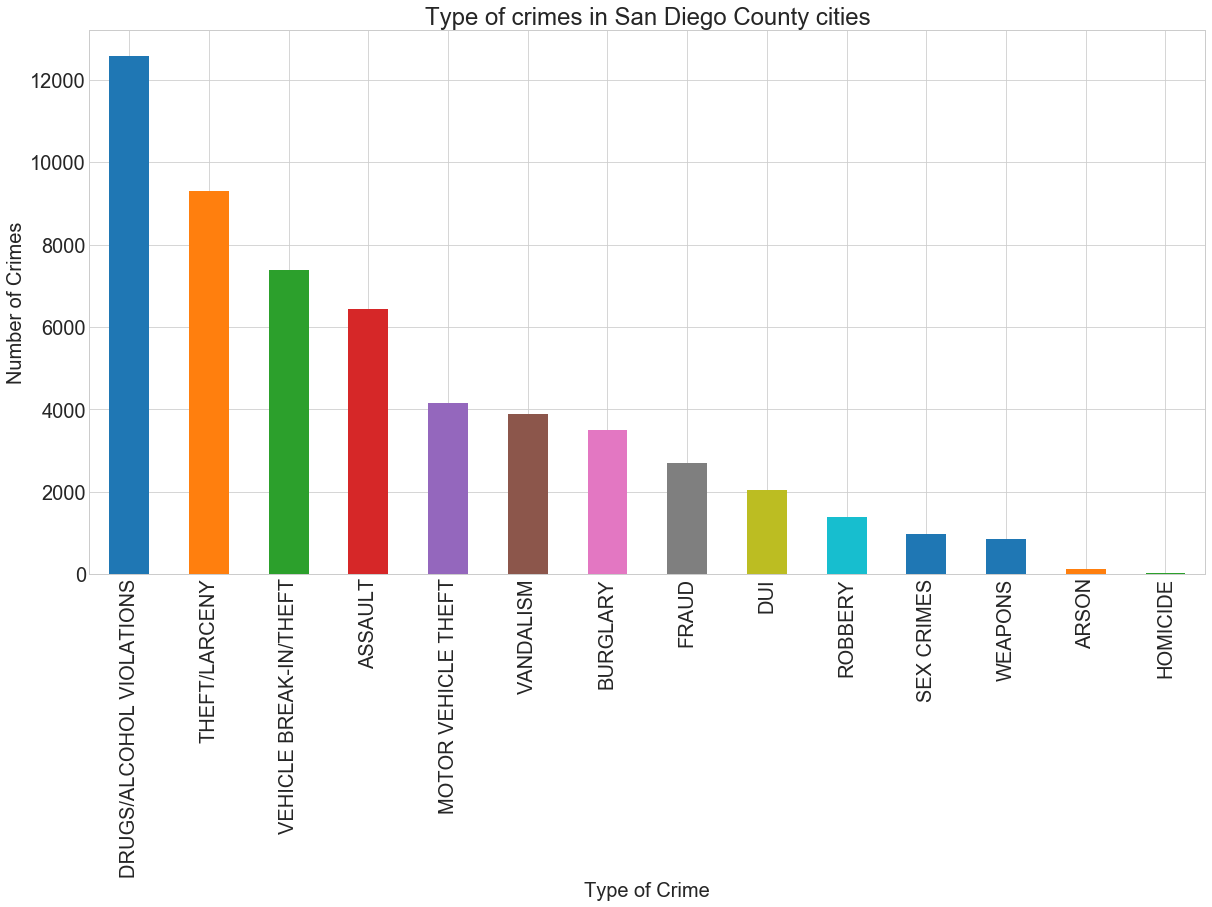

In [42]:
plt.gcf().set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
sd_zip_crime_geo_hprice['CM_LEGEND'].value_counts().plot(kind='bar')
plt.title('Type of crimes in San Diego County cities')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Crimes')

<Figure size 1440x720 with 0 Axes>

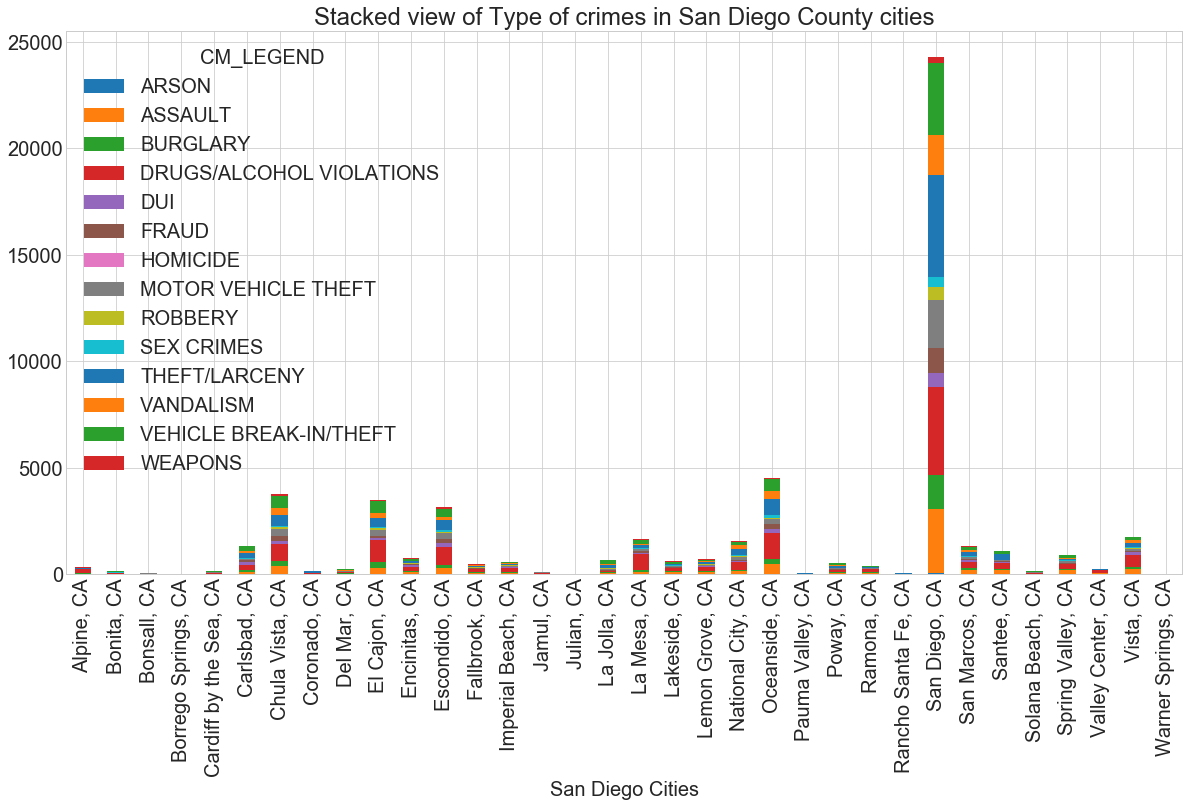

In [43]:
plt.gcf().set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
sd_zip_crime_geo_hprice.groupby(['ZipName','CM_LEGEND'])['ZipCode'].size().unstack().plot(kind='bar',stacked=True)
plt.title('Stacked view of Type of crimes in San Diego County cities')
plt.xlabel('San Diego Cities')
plt.gcf().set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})


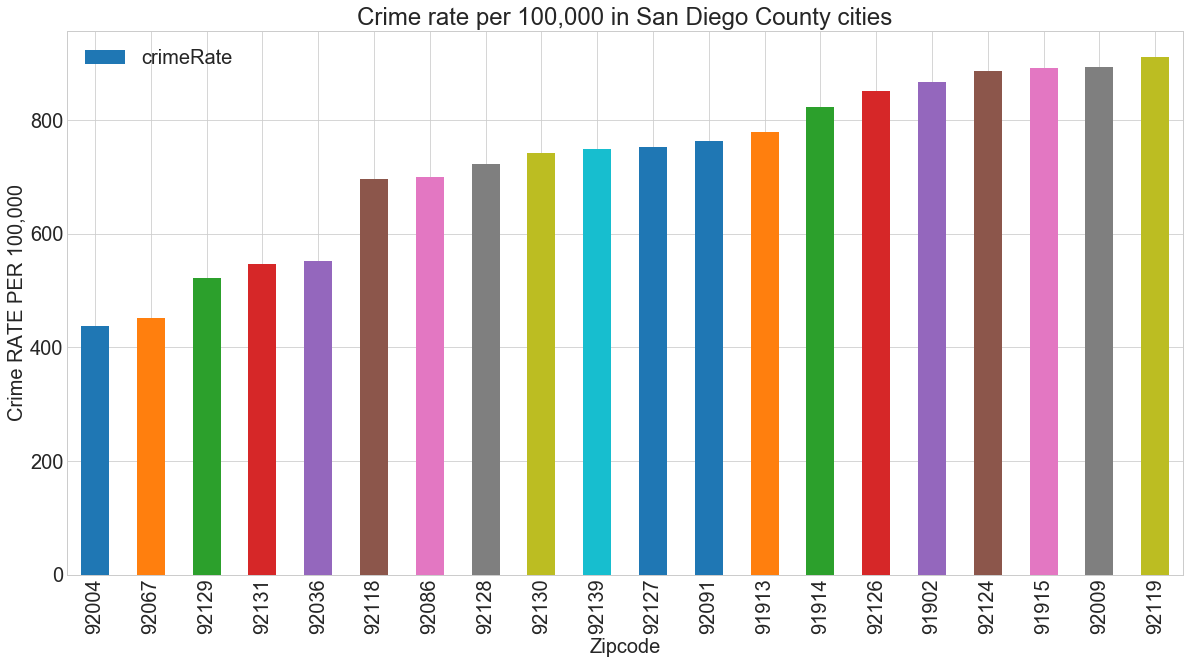

In [44]:
# Zipcodes with the least crime Rate
lesscrime = sd_zip_crime_geo_hprice_pop.head(20)
lesscrime.plot(kind='bar', x='ZipCode', y='crimeRate')
plt.title('Crime rate per 100,000 in San Diego County cities')
plt.xlabel('Zipcode')
plt.ylabel('Crime RATE PER 100,000')
plt.gcf().set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})

In [45]:
import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [46]:
address = 'San Diego, CA'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Diego are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Diego are 32.7174209, -117.1627714.


In [47]:
# create map of San Diego using latitude and longitude values
map_SD= folium.Map(location=[latitude, longitude], zoom_start=12)

In [48]:
map_SD

In [49]:

for lat, lng, label in zip(sd_zip_crime_geo_hprice_pop['Latitude'], sd_zip_crime_geo_hprice_pop['Longitude'], sd_zip_crime_geo_hprice_pop['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SD)  
    
map_SD

In [50]:
CLIENT_ID = 'ZPE0ZI4KCBUYTDS4QZ5BV2MFUAJ1YAEZPY04J54XRVIIOOKZ' # Foursquare ID
CLIENT_SECRET = 'G4OVTSU4WF5P0MHNZQ4JN0GQZ1YPIGZFPMV3IV1PAE1HTRYG' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZPE0ZI4KCBUYTDS4QZ5BV2MFUAJ1YAEZPY04J54XRVIIOOKZ
CLIENT_SECRET:G4OVTSU4WF5P0MHNZQ4JN0GQZ1YPIGZFPMV3IV1PAE1HTRYG


In [51]:
#Explore neighborhoods in San Diego
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
# Get all the venues
SD_venues = getNearbyVenues(sd_zip_crime_geo_hprice_pop['City'],sd_zip_crime_geo_hprice_pop['Latitude'],sd_zip_crime_geo_hprice_pop['Longitude'])

Borrego Springs
Rancho Santa Fe
San Diego
San Diego
Julian
Coronado
Warner Springs
San Diego
San Diego
San Diego
San Diego
Rancho Santa Fe
Chula Vista
Chula Vista
San Diego
Bonita
San Diego
Chula Vista
Carlsbad
San Diego
San Diego
Fallbrook
Poway
Ramona
San Marcos
Bonsall
Escondido
El Cajon
Cardiff By The Sea
Oceanside
San Diego
Escondido
San Diego
Solana Beach
Valley Center
La Jolla
Jamul
La Mesa
Lakeside
San Diego
Encinitas
Spring Valley
San Diego
San Diego
San Diego
Oceanside
Vista
Chula Vista
San Marcos
Del Mar
San Diego
Pauma Valley
Alpine
Escondido
Oceanside
San Diego
El Cajon
Santee
San Diego
San Diego
Chula Vista
San Diego
San Diego
San Diego
Imperial Beach
San Diego
National City
Vista
Lemon Grove
Escondido
El Cajon
La Mesa
San Diego
Carlsbad
San Diego
Oceanside
San Diego
San Diego
San Diego


In [53]:
print(SD_venues.shape)
SD_venues.head()

(632, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rancho Santa Fe,33.016492,-117.20264,Thyme In the Ranch,33.019136,-117.203267,Tea Room
1,Rancho Santa Fe,33.016492,-117.20264,Mille Fleurs,33.019430,-117.203440,Restaurant
2,Rancho Santa Fe,33.016492,-117.20264,Caffe Positano,33.019999,-117.203176,Coffee Shop
3,Rancho Santa Fe,33.016492,-117.20264,Chase Bank,33.019002,-117.202783,Bank
4,Rancho Santa Fe,33.016492,-117.20264,The Village Market,33.018710,-117.202640,Grocery Store


In [54]:
SD_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bonita,2,2,2,2,2,2
Bonsall,2,2,2,2,2,2
Cardiff By The Sea,4,4,4,4,4,4
Carlsbad,6,6,6,6,6,6
Chula Vista,25,25,25,25,25,25
Coronado,30,30,30,30,30,30
Del Mar,5,5,5,5,5,5
El Cajon,8,8,8,8,8,8
Encinitas,4,4,4,4,4,4


In [55]:
SD_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bonita,2,2,2,2,2,2
Bonsall,2,2,2,2,2,2
Cardiff By The Sea,4,4,4,4,4,4
Carlsbad,6,6,6,6,6,6
Chula Vista,25,25,25,25,25,25
Coronado,30,30,30,30,30,30
Del Mar,5,5,5,5,5,5
El Cajon,8,8,8,8,8,8
Encinitas,4,4,4,4,4,4


In [56]:
print('There are {} uniques categories.'.format(len(SD_venues['Venue Category'].unique())))

There are 171 uniques categories.


In [57]:
#Analyze each Neighborhood
# one hot encoding
SD_onehot = pd.get_dummies(SD_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SD_onehot['Neighborhood'] = SD_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SD_onehot.columns[-1]] + list(SD_onehot.columns[:-1])
SD_onehot = SD_onehot[fixed_columns]

SD_onehot.head()

,Neighborhood,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Yoga Studio
0,Rancho Santa Fe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rancho Santa Fe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rancho Santa Fe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rancho Santa Fe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rancho Santa Fe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
SD_onehot.shape

(632, 172)

In [59]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category¶
SD_grouped = SD_onehot.groupby('Neighborhood').mean().reset_index()
SD_grouped

,Neighborhood,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Yoga Studio
0,Bonita,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Bonsall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Cardiff By The Sea,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Carlsbad,0.000000,0.000000,0.000000,0.000000,0.166667,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Chula Vista,0.000000,0.000000,0.000000,0.040000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.0,0.000000,0.000000,0.000000
5,Coronado,0.000000,0.000000,0.000000,0.033333,0.000000,0.000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.033333,0.000000,0.000000
6,Del Mar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,El Cajon,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,Encinitas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,Escondido,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.0,0.000000,0.000000,0.000000


In [60]:
SD_grouped.shape

(27, 172)

In [61]:
num_top_venues = 5

for hood in SD_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SD_grouped[SD_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bonita----
            venue  freq
0  Baseball Field   0.5
1  Farmers Market   0.5
2             ATM   0.0
3          Museum   0.0
4     Music Store   0.0


----Bonsall----
                        venue  freq
0                  Racecourse   0.5
1  Construction & Landscaping   0.5
2                         ATM   0.0
3             Paintball Field   0.0
4                      Museum   0.0


----Cardiff By The Sea----
                   venue  freq
0     Mexican Restaurant  0.25
1                  Hotel  0.25
2         Scenic Lookout  0.25
3              Rest Area  0.25
4  Outdoors & Recreation  0.00


----Carlsbad----
                venue  freq
0    Business Service  0.33
1   Convenience Store  0.17
2  Athletics & Sports  0.17
3                Food  0.17
4              Resort  0.17


----Chula Vista----
                venue  freq
0         Pizza Place  0.08
1                Park  0.08
2   Convenience Store  0.08
3  Mexican Restaurant  0.04
4   Martial Arts Dojo  0.04


----Coronado-

In [62]:
#sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in py.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SD_grouped['Neighborhood']

for ind in py.arange(SD_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SD_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bonita,Baseball Field,Farmers Market,Yoga Studio,Fried Chicken Joint,Food Truck,Food,Flower Shop,Flea Market,Fish Market,Financial or Legal Service
1,Bonsall,Racecourse,Construction & Landscaping,Yoga Studio,Falafel Restaurant,Food,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Fast Food Restaurant
2,Cardiff By The Sea,Mexican Restaurant,Rest Area,Hotel,Scenic Lookout,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Fast Food Restaurant,Farmers Market
3,Carlsbad,Business Service,Food,Athletics & Sports,Convenience Store,Resort,Yoga Studio,Farm,Flower Shop,Flea Market,Fish Market
4,Chula Vista,Park,Pizza Place,Convenience Store,Sushi Restaurant,Paintball Field,Dog Run,Noodle House,Mexican Restaurant,Martial Arts Dojo,Chinese Restaurant


In [64]:
from sklearn.cluster import KMeans
# Cluster Neighborhoods
# set number of clusters
# Use k means to cluster the neighborhood into 5 
kclusters = 5

SD_grouped_clustering = SD_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SD_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [66]:
#lets rename City to Neighborhood
sd_zip_crime_geo_hprice_pop.rename(columns={'City':'Neighborhood'},inplace=True)



In [67]:
SD_merged = sd_zip_crime_geo_hprice_pop

# merge data to add latitude/longitude for each neighborhood
SD_merged = SD_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SD_merged.head() 

,ZipName,ZipCode,Latitude,Longitude,Avg Listing Price,CrimeCounts,Neighborhood,Population,crimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Borrego Springs, CA",92004,33.184028,-116.26597,402984,17,Borrego Springs,3881,438.031435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Rancho Santa Fe, CA",92067,33.016492,-117.20264,4877557,43,Rancho Santa Fe,9535,450.970110,0.0,Restaurant,American Restaurant,Grocery Store,Golf Course,Health & Beauty Service,Park,Sandwich Place,Bank,Coffee Shop,Tea Room
65,"San Diego, CA",92129,32.961014,-117.12510,847213,269,San Diego,51536,521.965228,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
67,"San Diego, CA",92131,32.918035,-117.08438,1221888,179,San Diego,32787,545.948089,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
25,"Julian, CA",92036,33.027570,-116.53109,745463,19,Julian,3440,552.325581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
SD_merged.shape

(79, 20)

In [69]:
SD_merged.columns

Index(['ZipName', 'ZipCode', 'Latitude', 'Longitude', 'Avg Listing Price',
       'CrimeCounts', 'Neighborhood', 'Population', 'crimeRate',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [70]:
#drop rows if Cluser Label is NaN
SD_merged_venuesonly =  SD_merged.dropna(subset=['Cluster Labels'])

In [71]:
#Change Cluster Labels to int
#SD_merged_venuesonly['Cluster Labels'] = SD_merged_venuesonly['Cluster Labels'].astype(int)

In [72]:
SD_merged_venuesonly.head(50)

,ZipName,ZipCode,Latitude,Longitude,Avg Listing Price,CrimeCounts,Neighborhood,Population,crimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,"Rancho Santa Fe, CA",92067,33.016492,-117.202640,4877557,43,Rancho Santa Fe,9535,450.970110,0.0,Restaurant,American Restaurant,Grocery Store,Golf Course,Health & Beauty Service,Park,Sandwich Place,Bank,Coffee Shop,Tea Room
65,"San Diego, CA",92129,32.961014,-117.125100,847213,269,San Diego,51536,521.965228,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
67,"San Diego, CA",92131,32.918035,-117.084380,1221888,179,San Diego,32787,545.948089,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
12,"Coronado, CA",92118,32.682727,-117.174410,3870059,164,Coronado,23575,695.652174,0.0,Seafood Restaurant,Ice Cream Shop,Hotel,New American Restaurant,Mexican Restaurant,Asian Restaurant,Bar,Spa,Pub,Beach
64,"San Diego, CA",92128,32.998855,-117.070540,793956,343,San Diego,47490,722.257317,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
66,"San Diego, CA",92130,32.946776,-117.219180,2051795,363,San Diego,48940,741.724561,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
68,"San Diego, CA",92139,32.677286,-117.052410,499803,263,San Diego,35125,748.754448,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
63,"San Diego, CA",92127,33.022384,-117.106940,1929515,296,San Diego,39337,752.472227,0.0,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Gym,Ice Cream Shop,Sushi Restaurant,Seafood Restaurant
40,"Rancho Santa Fe, CA",92091,32.993541,-117.213110,3139282,8,Rancho Santa Fe,1048,763.358779,0.0,Restaurant,American Restaurant,Grocery Store,Golf Course,Health & Beauty Service,Park,Sandwich Place,Bank,Coffee Shop,Tea Room
9,"Chula Vista, CA",91913,32.642486,-116.989730,633859,319,Chula Vista,40971,778.599497,0.0,Park,Pizza Place,Convenience Store,Sushi Restaurant,Paintball Field,Dog Run,Noodle House,Mexican Restaurant,Martial Arts Dojo,Chinese Restaurant


In [73]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map of clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the cluster
x = py.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(py.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SD_merged['Latitude'], SD_merged['Longitude'], SD_merged['Neighborhood'], SD_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters